In [ ]:
#  Gọi các thư viên cần thiết
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.backend import dropout
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
# Chia dữ liệu thành 2 phần:  phần huyến luyện và phần test
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()

In [ ]:
# Kích thước các tập dữ liệu
x_train.shape , x_test .shape,  y_train.shape,  y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

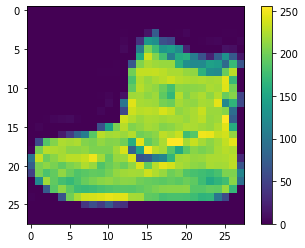

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

<function matplotlib.pyplot.show>

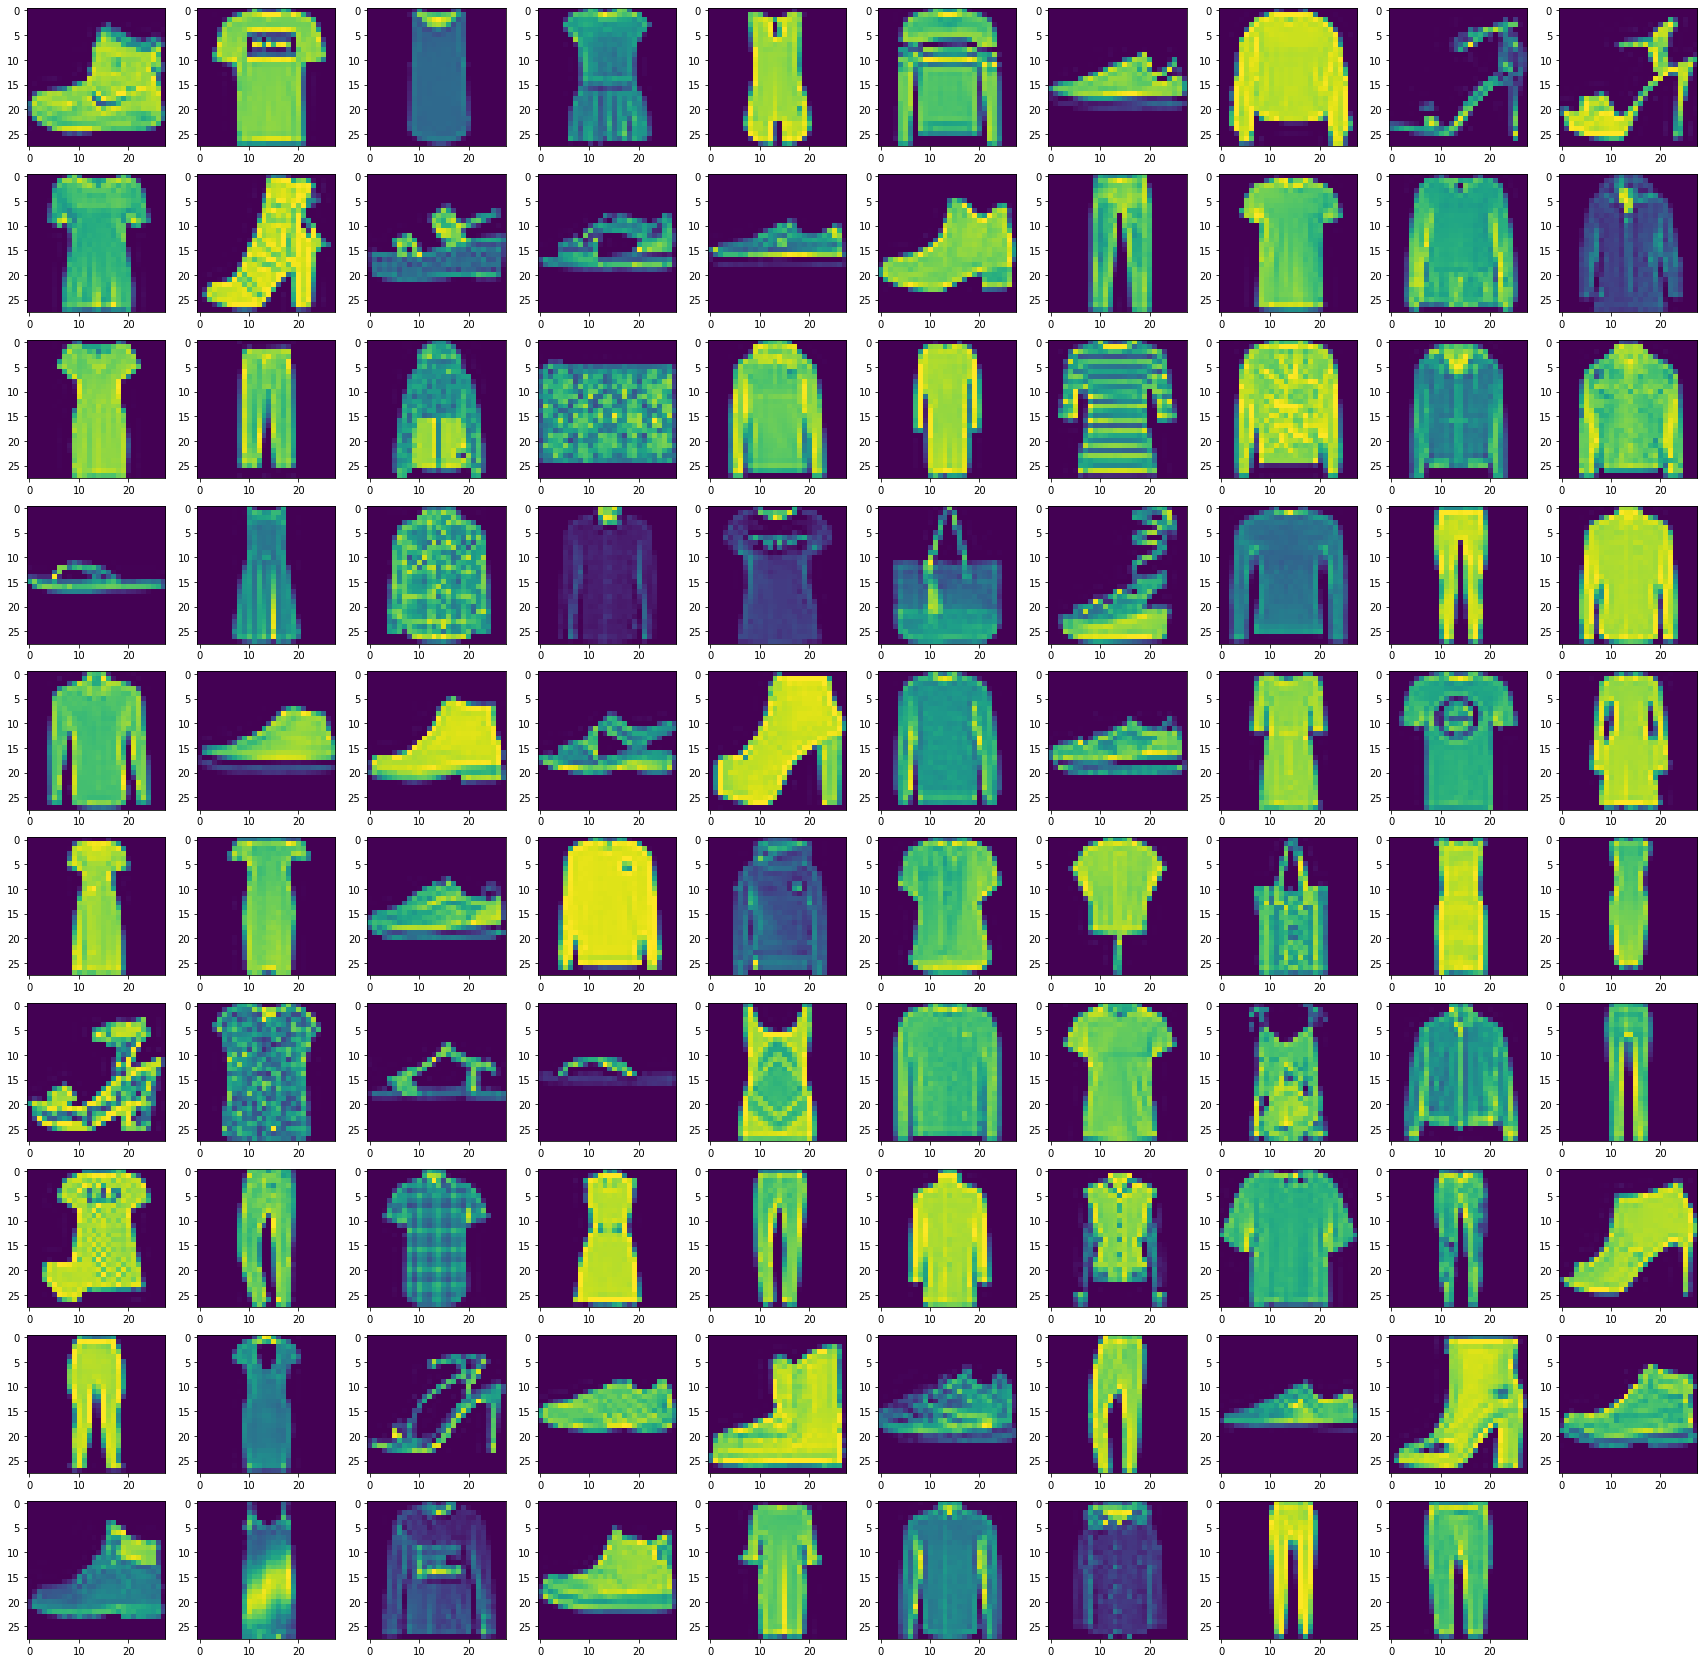

In [ ]:
plt.figure(figsize=(30,30))
for i in range(99):
  plt.subplot(10,10,i+1)
  plt.imshow(x_train[i])
plt.show

In [ ]:
#  x_train , x_test  là mảng 3 chiều nên chuyển sang mảng 2 chiều 
x_train = x_train.reshape(60000 , 784)  #28*28
x_test = x_test.reshape(10000 ,  784 )   #28*28

# Chuẩn hóa dữ liệu
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /= 255

# Chuyển y thành 100 class do output là 100
y_train =np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
# Tạo mạng neron nhân tạo
model = Sequential()
model.add(Dense(512, kernel_initializer= 'normal', activation='relu',input_shape=(784,)))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,962
Trainable params: 669,962
Non-trai

In [ ]:
# Huấn luyện mô hình 
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=128, epochs=500 , verbose=1 , validation_split=0.2 , callbacks=[EarlyStopping(monitor='val_loss',patience=70)])

Epoch 1/500
375/375 [==============================] - 4s 7ms/step - loss: 0.6049 - accuracy: 0.7801 - val_loss: 0.4648 - val_accuracy: 0.8278
Epoch 2/500
375/375 [==============================] - 2s 6ms/step - loss: 0.4141 - accuracy: 0.8498 - val_loss: 0.4036 - val_accuracy: 0.8512
Epoch 3/500
375/375 [==============================] - 2s 6ms/step - loss: 0.3708 - accuracy: 0.8646 - val_loss: 0.4017 - val_accuracy: 0.8645
Epoch 4/500
375/375 [==============================] - 2s 6ms/step - loss: 0.3465 - accuracy: 0.8725 - val_loss: 0.3577 - val_accuracy: 0.8698
Epoch 5/500
375/375 [==============================] - 2s 6ms/step - loss: 0.3316 - accuracy: 0.8802 - val_loss: 0.3551 - val_accuracy: 0.8804
Epoch 6/500
375/375 [==============================] - 2s 6ms/step - loss: 0.3187 - accuracy: 0.8841 - val_loss: 0.4640 - val_accuracy: 0.8652
Epoch 7/500
375/375 [==============================] - 2s 6ms/step - loss: 0.3100 - accuracy: 0.8877 - val_loss: 0.3685 - val_accuracy: 0.8806

In [ ]:
# Lưu kết quả của model
from tensorflow.keras.models import load_model
model.save('huyFashion.h5')
load_model('huyFashion.h5')

In [ ]:
# Đánh giá độ chính xác của mô hình
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  1.5658823251724243
Độ chính xác kiểm tra là:  0.8709999918937683


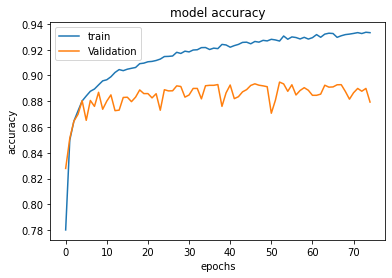

In [ ]:
# Vẽ lại quá trình học
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [ ]:
# Kiểm tra kết quả của mô hình
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
# filename = "deplao.png"
filename = "bag.png"
# filename = "aokhoac.png"
img = cv2.imread(filename, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

dim = (28, 28)
# img_new = load_img(gray,target_size=(32,32))
resized = cv2.resize(gray, dim, interpolation = cv2.INTER_AREA)

img = img_to_array(resized)
img = img.reshape(1,28*28)
img = img.astype('float32')
img = img/255

np.argmax(model.predict(img),axis=-1)

array([8])